In [2]:
import math

import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm.auto import tqdm

import ddpm_Time_Series_copy
import numpy as np
import pandas as pd
import torch

from sklearn.datasets import make_moons
from torch.utils.data import TensorDataset

#===========================

/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
# print the organisation of the datasets folder until the files using os.walk
import os

for root, dirs, files in os.walk('datasets'):
    level = root.replace('datasets', '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)

        
#===========================

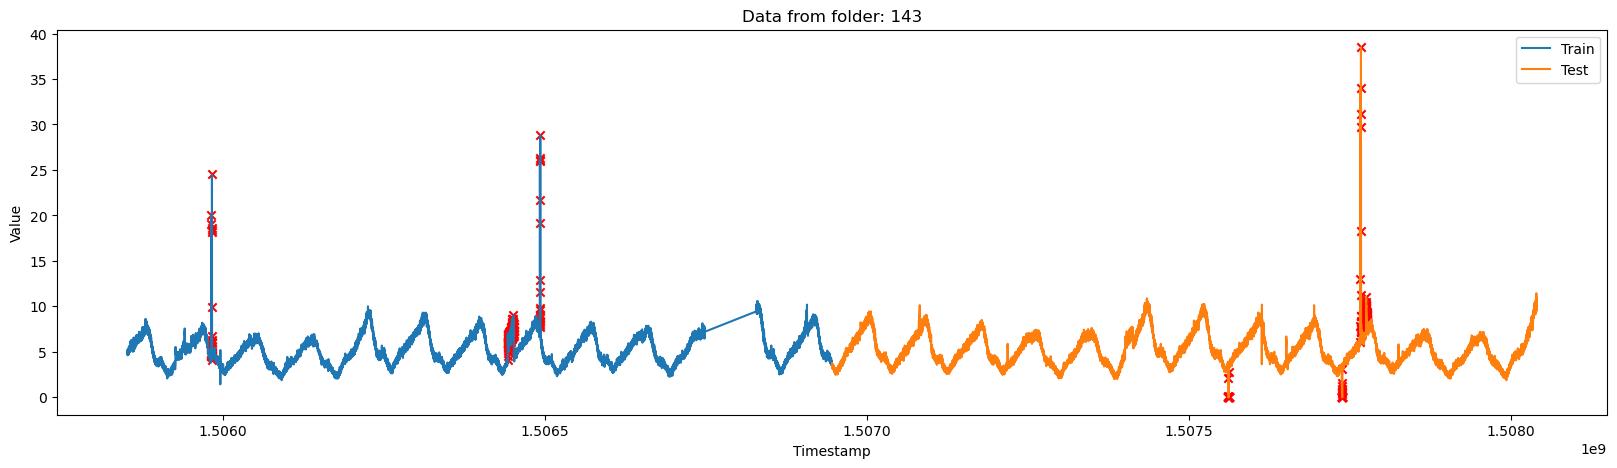

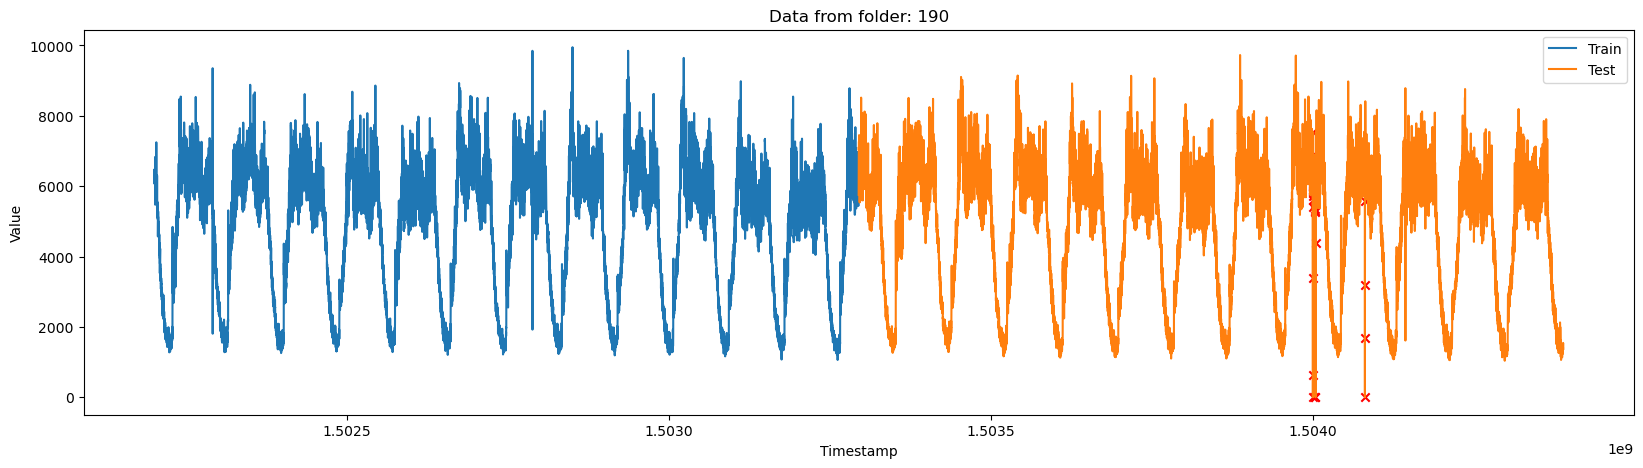

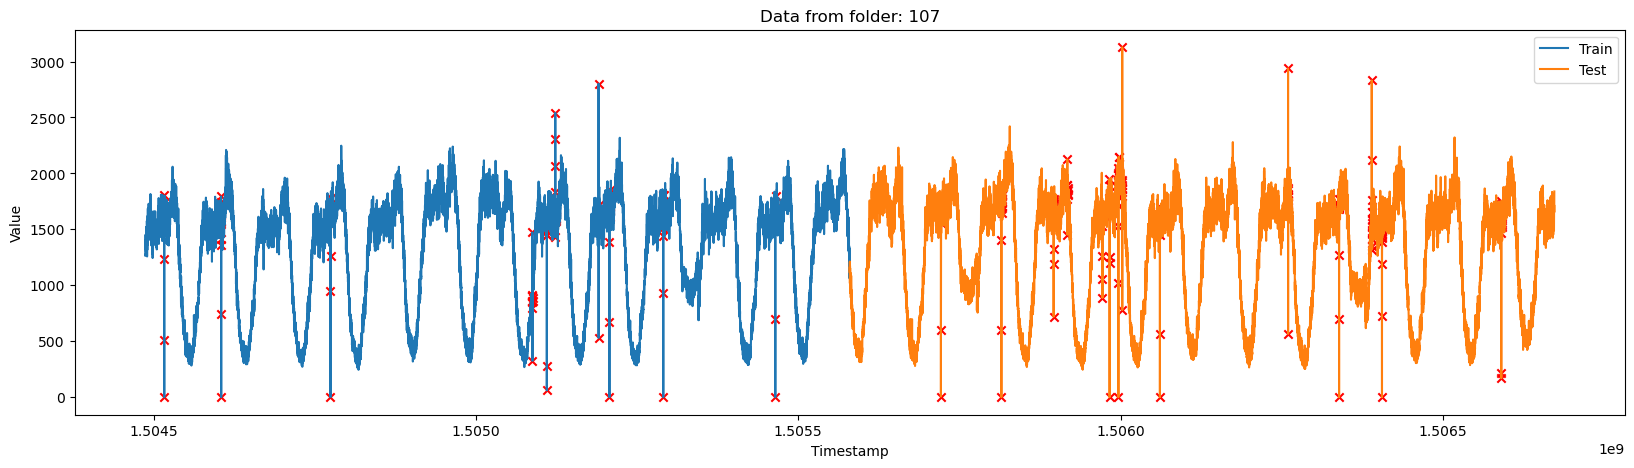

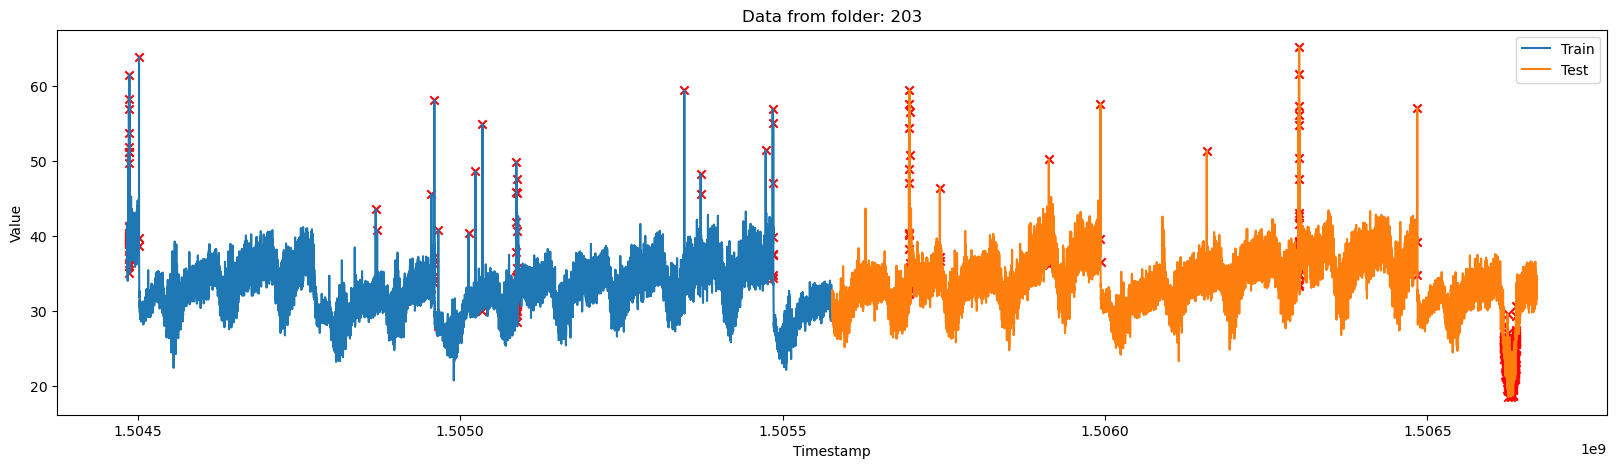

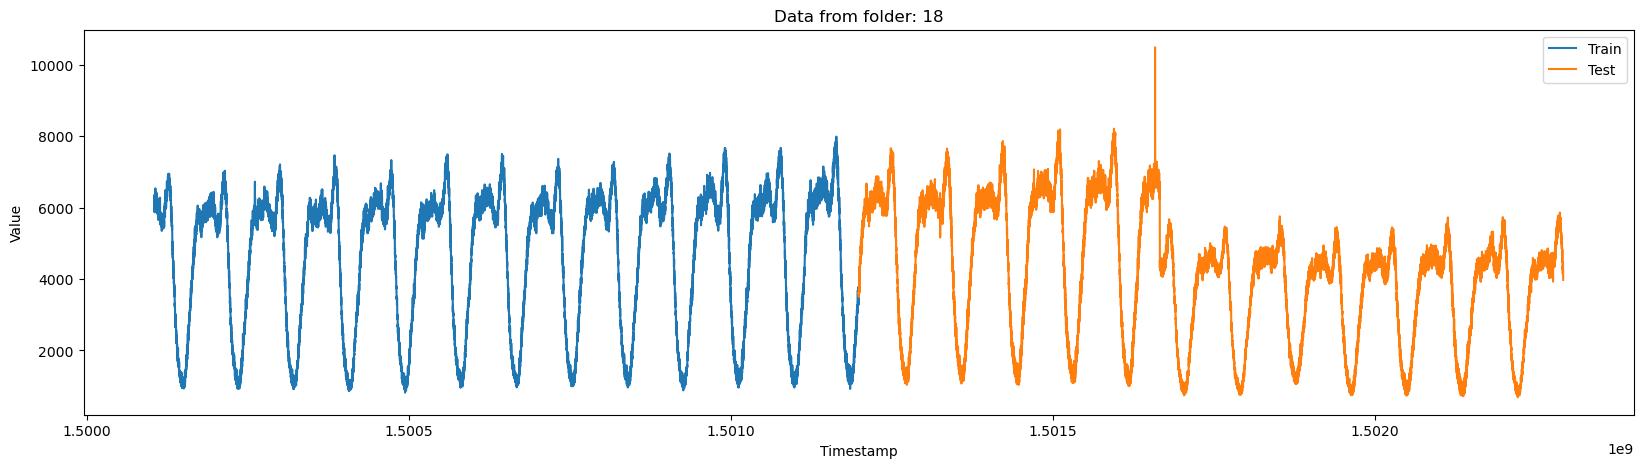

In [6]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt

# Select 5 random folders
folders = os.listdir('../datasets/UTS/WSD')
folders = random.sample(folders, 5)

# Plot the train.npy and test.npy files in each selected folder
for folder in folders:
    train_data = np.load(f'../datasets/UTS/WSD/{folder}/train.npy')
    print
    test_data = np.load(f'../datasets/UTS/WSD/{folder}/test.npy')
    
    train_timestamp = np.load(f'../datasets/UTS/WSD/{folder}/train_timestamp.npy')
    test_timestamp = np.load(f'../datasets/UTS/WSD/{folder}/test_timestamp.npy')
    
    # Plot the train and test data in one figure using different colors
    plt.figure(figsize=(20, 5))
    plt.plot(train_timestamp, train_data, label='Train')
    plt.plot(test_timestamp, test_data, label='Test')
    
    # Plot anomalies as points in red
    train_label = np.load(f'../datasets/UTS/WSD/{folder}/train_label.npy')
    test_label = np.load(f'../datasets/UTS/WSD/{folder}/test_label.npy')
    
    for i, label in enumerate(train_label):
        if label:
            plt.scatter(train_timestamp[i], train_data[i], color='red', marker='x', label='Anomaly' if i == 0 else "")
    for i, label in enumerate(test_label):
        if label:
            plt.scatter(test_timestamp[i], test_data[i], color='red', marker='x', label='Anomaly' if i == 0 else "")
            
    plt.title(f"Data from folder: {folder}")
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    



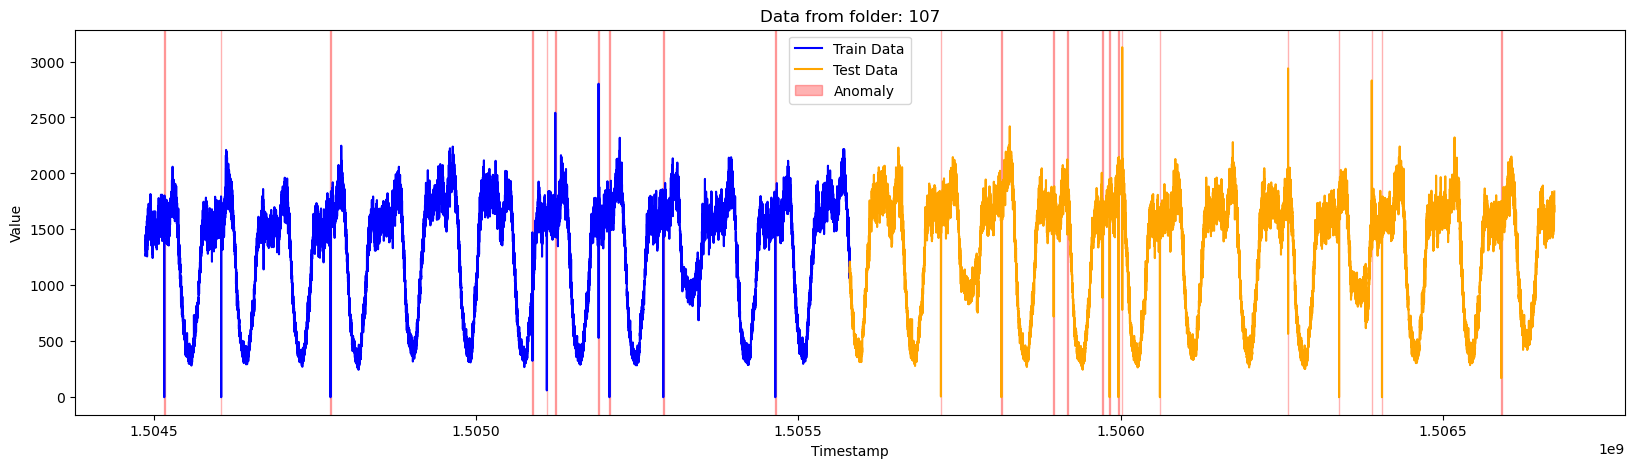

In [3]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Select 5 random folders
folders = os.listdir('../datasets/UTS/WSD')
folders = random.sample(folders, 5)
folders = [107]

# Plot the train.npy and test.npy files in each selected folder
for folder in folders:
    # Load data
    train_data = np.load(f'../datasets/UTS/WSD/{folder}/train.npy')
    test_data = np.load(f'../datasets/UTS/WSD/{folder}/test.npy')
    train_timestamp = np.load(f'../datasets/UTS/WSD/{folder}/train_timestamp.npy')
    test_timestamp = np.load(f'../datasets/UTS/WSD/{folder}/test_timestamp.npy')
    train_label = np.load(f'../datasets/UTS/WSD/{folder}/train_label.npy')
    test_label = np.load(f'../datasets/UTS/WSD/{folder}/test_label.npy')

    # Combine train and test data
    all_data = np.concatenate((train_data, test_data))
    all_timestamp = np.concatenate((train_timestamp, test_timestamp))
    all_label = np.concatenate((train_label, test_label))

    # Plot the data
    plt.figure(figsize=(20, 5))
    
    # Plot train data in blue
    plt.plot(train_timestamp, train_data, color='blue', label='Train Data')
    
    # Plot test data in orange
    plt.plot(test_timestamp, test_data, color='orange', label='Test Data')

    # Highlight anomaly regions
    anomaly_start = None
    for i, label in enumerate(all_label):
        if label and anomaly_start is None:
            anomaly_start = all_timestamp[i]
        elif not label and anomaly_start is not None:
            plt.axvspan(anomaly_start, all_timestamp[i-1], color='red', alpha=0.3)
            anomaly_start = None

    # If there's an open anomaly region at the end
    if anomaly_start is not None:
        plt.axvspan(anomaly_start, all_timestamp[-1], color='red', alpha=0.3)

    plt.title(f"Data from folder: {folder}")
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    
    # Create a custom legend
    legend_elements = [
        plt.Line2D([0], [0], color='blue', label='Train Data'),
        plt.Line2D([0], [0], color='orange', label='Test Data'),
        Patch(facecolor='red', edgecolor='red', alpha=0.3, label='Anomaly')
    ]
    plt.legend(handles=legend_elements)
    
    plt.show()

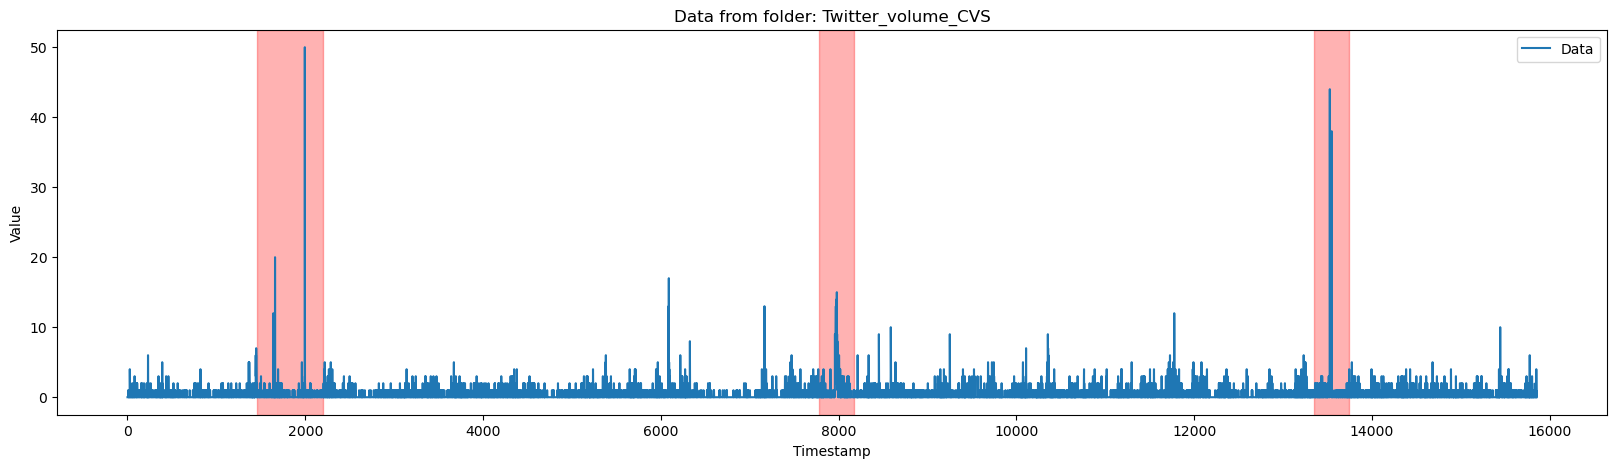

In [4]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt

VARDATA = 'NAB'
# Select 5 random folders
folders = os.listdir('../datasets/UTS/'+VARDATA)
folders = random.sample(folders, 5)
folders = ['Twitter_volume_CVS']

# Plot the train.npy and test.npy files in each selected folder
for folder in folders:
    # Load data
    train_data = np.load(f'../datasets/UTS/'+VARDATA+f'/{folder}/train.npy')
    test_data = np.load(f'../datasets/UTS/'+VARDATA+f'/{folder}/test.npy')
    train_label = np.load(f'../datasets/UTS/'+VARDATA+f'/{folder}/train_label.npy')
    test_label = np.load(f'../datasets/UTS/'+VARDATA+f'/{folder}/test_label.npy')

    # Combine train and test data
    all_data = np.concatenate((train_data, test_data))
    all_label = np.concatenate((train_label, test_label))

    # Plot the data
    plt.figure(figsize=(20, 5))
    plt.plot(all_data, label='Data')

    all_timestamp = np.arange(all_data.shape[0])
    # Highlight anomaly regions
    anomaly_start = None
    for i, label in enumerate(all_label):
        if label and anomaly_start is None:
            anomaly_start = all_timestamp[i]
        elif not label and anomaly_start is not None:
            plt.axvspan(anomaly_start, all_timestamp[i-1], color='red', alpha=0.3)
            anomaly_start = None

    # If there's an open anomaly region at the end
    if anomaly_start is not None:
        plt.axvspan(anomaly_start, all_timestamp[-1], color='red', alpha=0.3)

    plt.title(f"Data from folder: {folder}")
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    



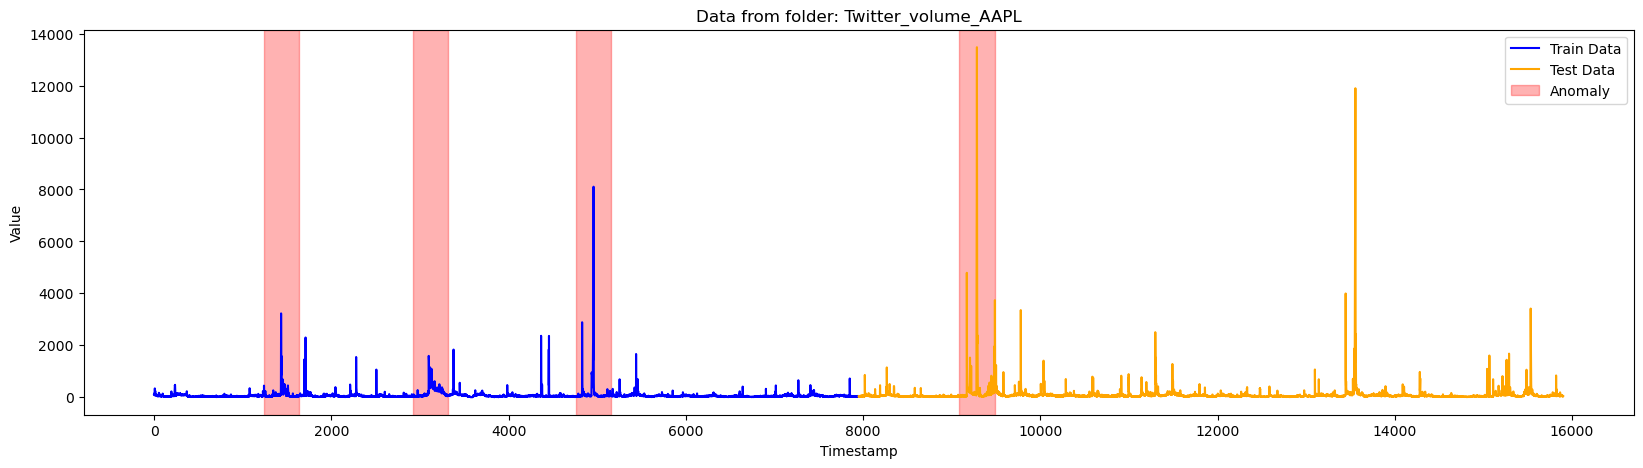

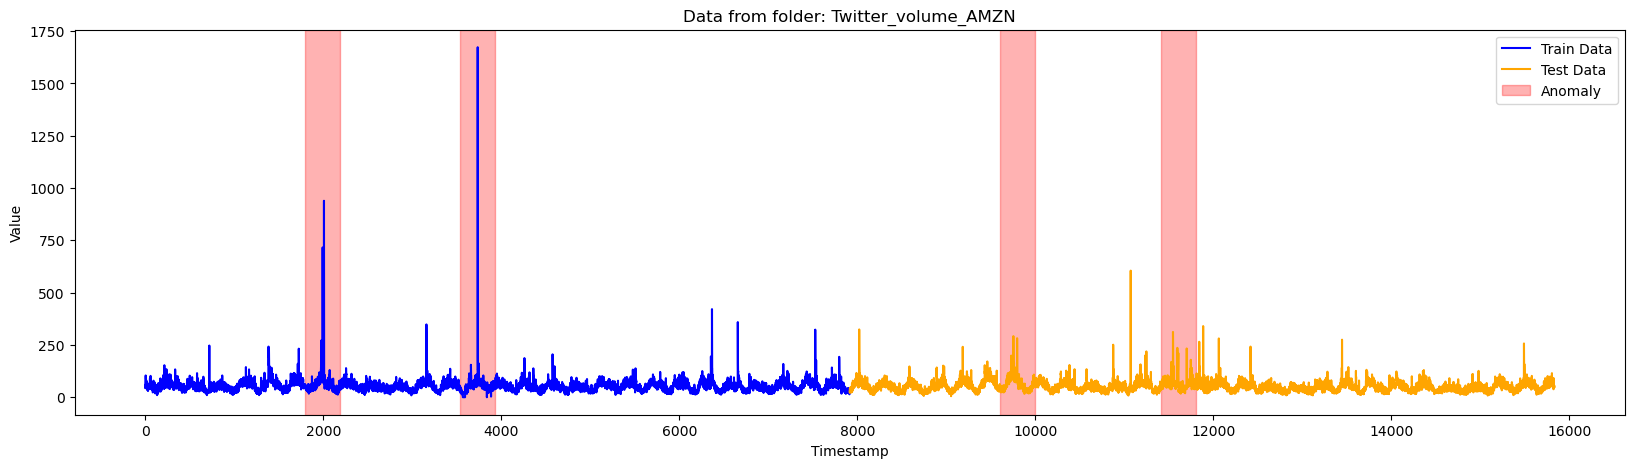

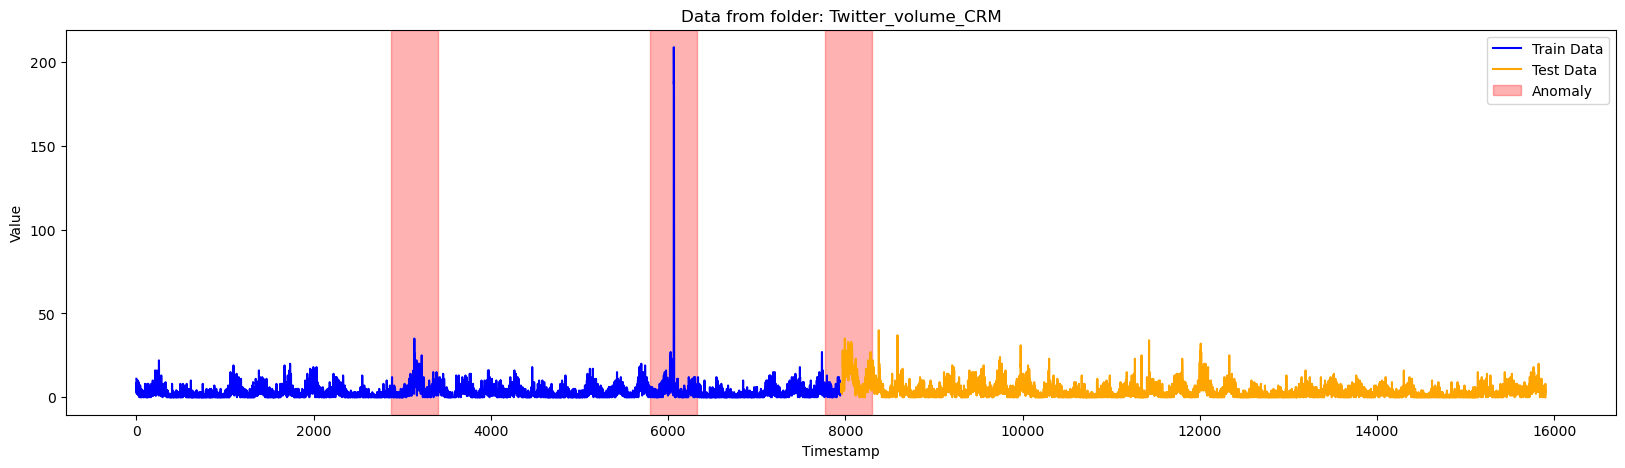

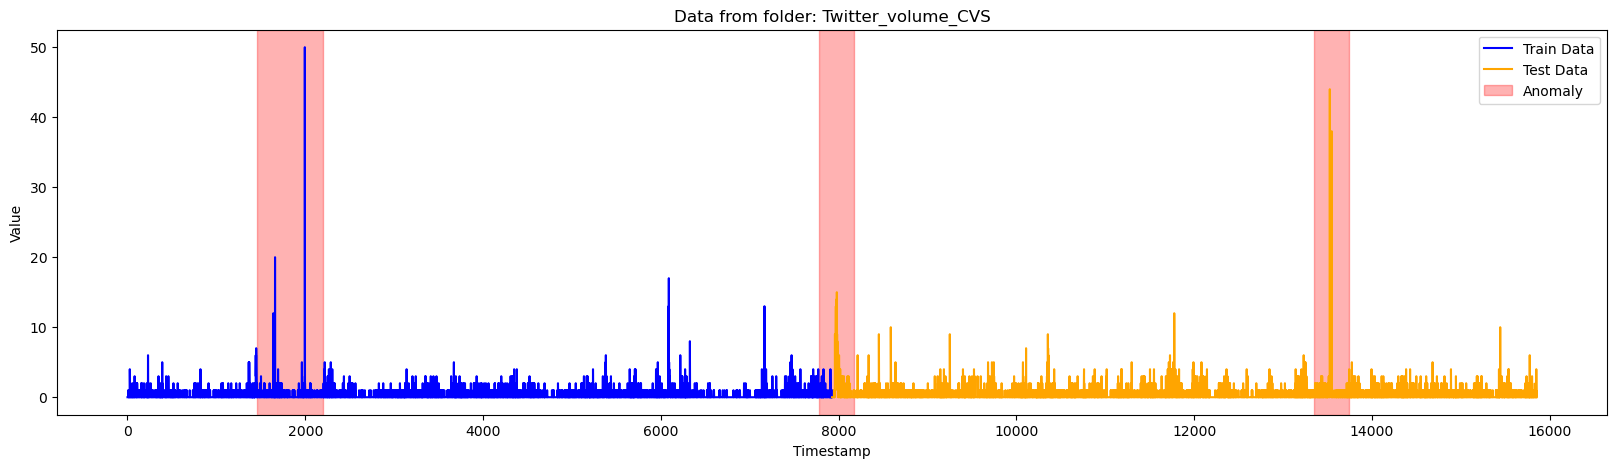

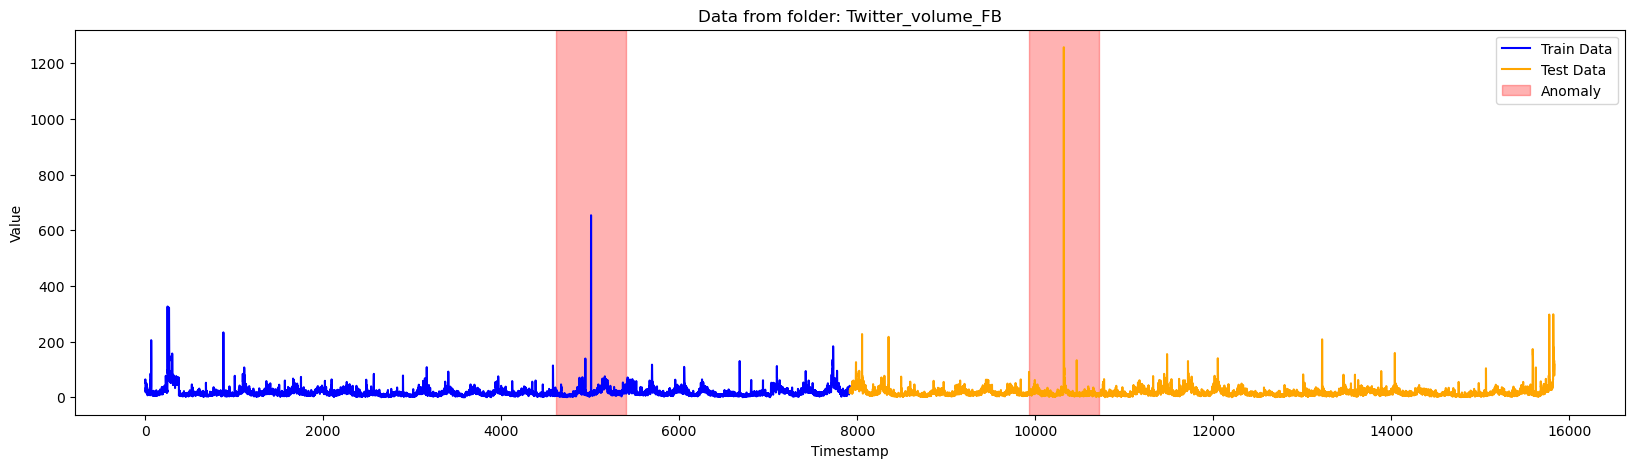

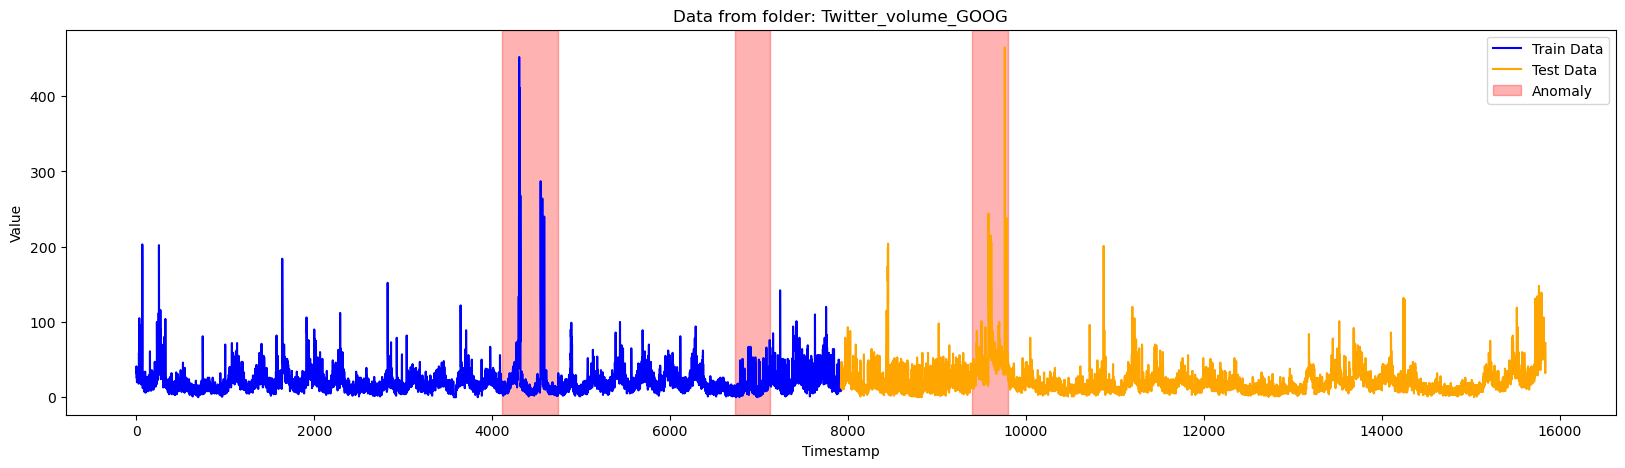

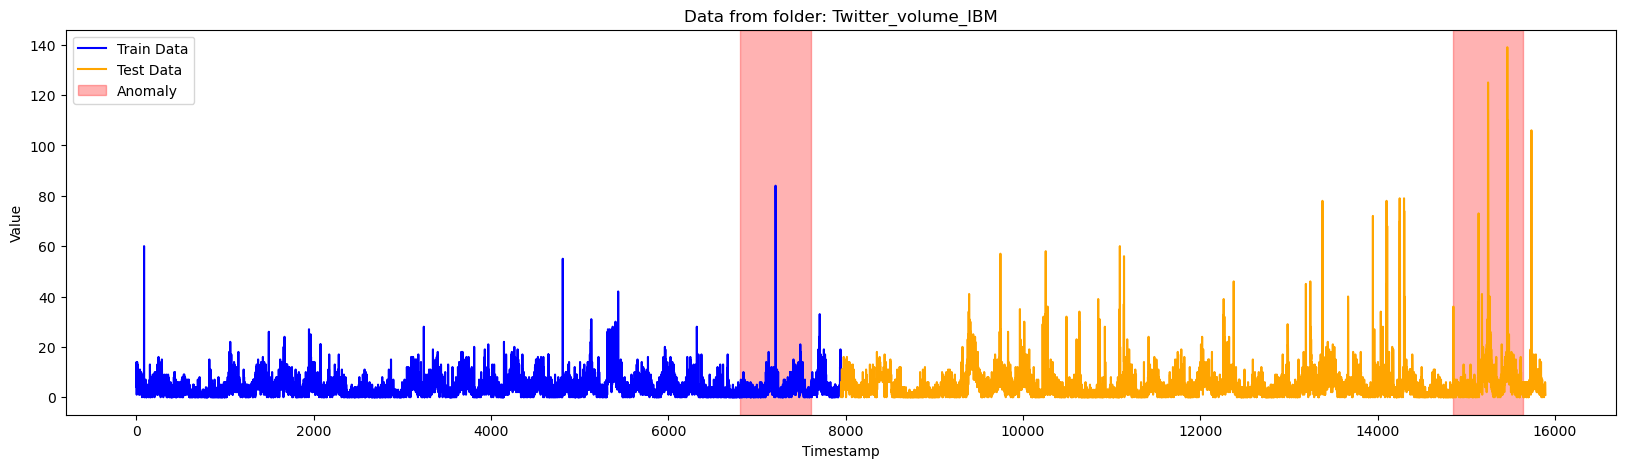

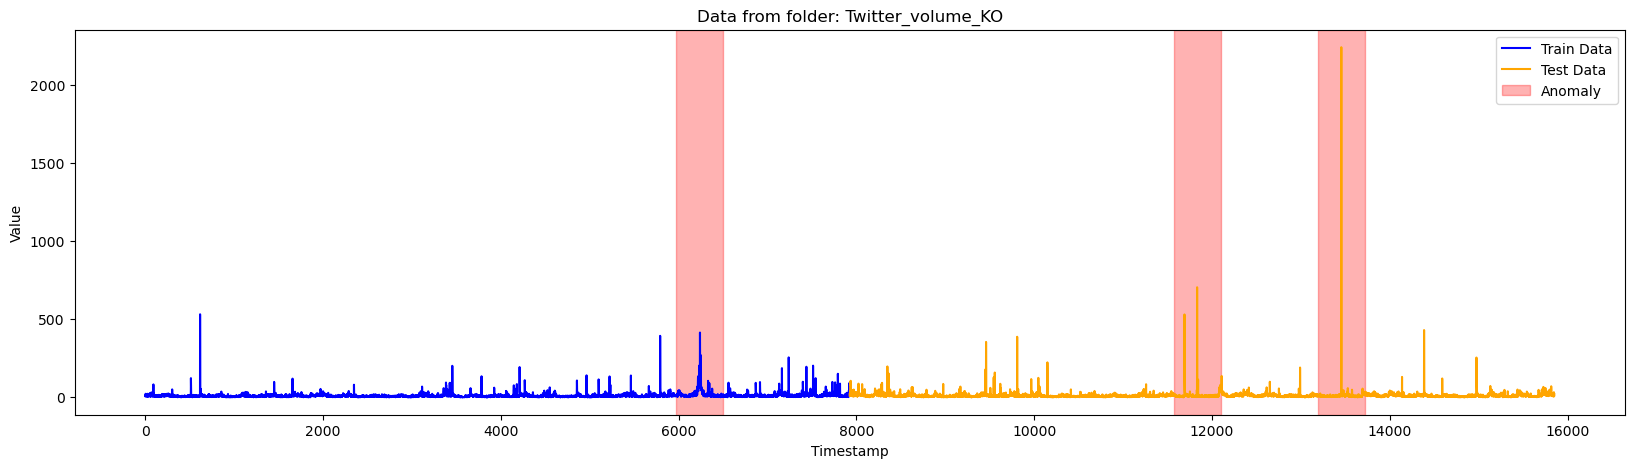

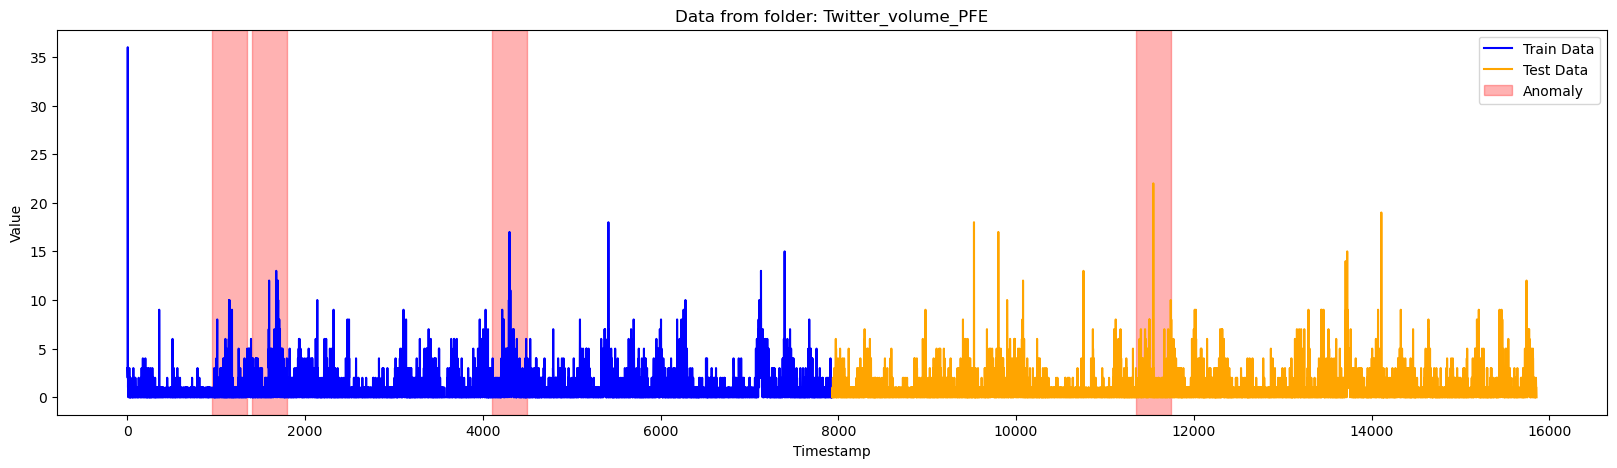

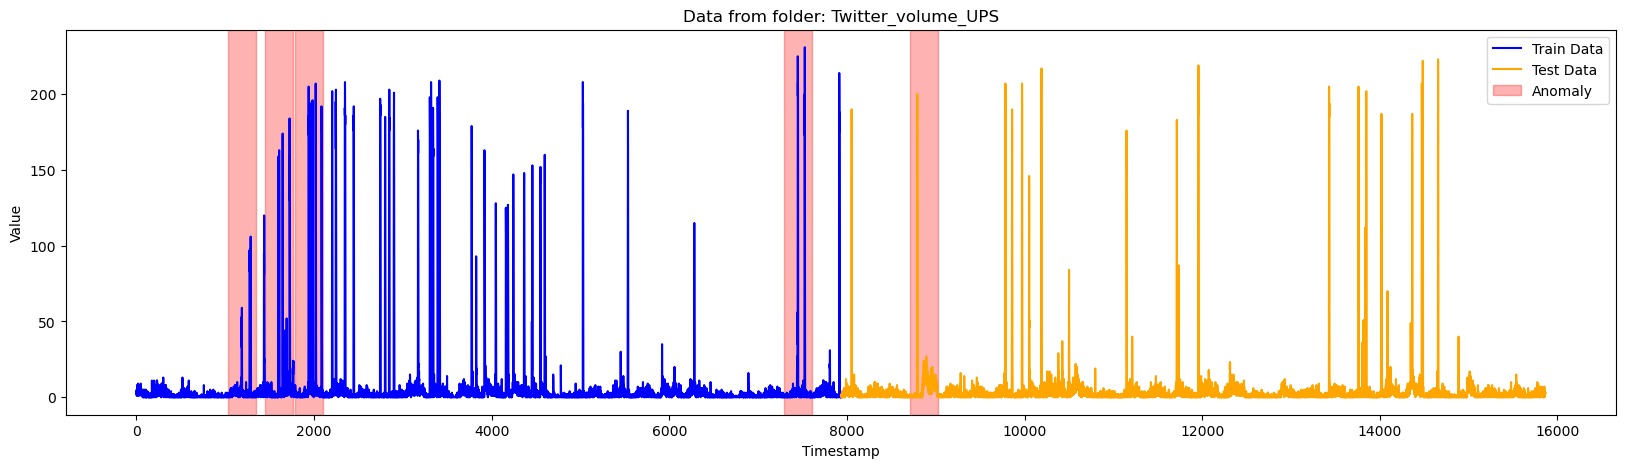

In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

VARDATA = 'NAB'
# Select 5 random folders
folders = os.listdir('../datasets/UTS/'+VARDATA)
#folders = random.sample(folders, 5)
#folders = ['Twitter_volume_CVS']

# Plot the train.npy and test.npy files in each selected folder
for folder in folders:
    # Load data
    train_data = np.load(f'../datasets/UTS/'+VARDATA+f'/{folder}/train.npy')
    test_data = np.load(f'../datasets/UTS/'+VARDATA+f'/{folder}/test.npy')
    train_label = np.load(f'../datasets/UTS/'+VARDATA+f'/{folder}/train_label.npy')
    test_label = np.load(f'../datasets/UTS/'+VARDATA+f'/{folder}/test_label.npy')

    # Combine train and test data
    all_data = np.concatenate((train_data, test_data))
    all_label = np.concatenate((train_label, test_label))

    # Plot the data
    plt.figure(figsize=(20, 5))
    
    # Plot train data in blue
    plt.plot(range(len(train_data)), train_data, color='blue', label='Train Data')
    
    # Plot test data in orange
    plt.plot(range(len(train_data), len(all_data)), test_data, color='orange', label='Test Data')

    all_timestamp = np.arange(all_data.shape[0])
    # Highlight anomaly regions
    anomaly_start = None
    for i, label in enumerate(all_label):
        if label and anomaly_start is None:
            anomaly_start = all_timestamp[i]
        elif not label and anomaly_start is not None:
            plt.axvspan(anomaly_start, all_timestamp[i-1], color='red', alpha=0.3)
            anomaly_start = None

    # If there's an open anomaly region at the end
    if anomaly_start is not None:
        plt.axvspan(anomaly_start, all_timestamp[-1], color='red', alpha=0.3)

    plt.title(f"Data from folder: {folder}")
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    
    # Create a custom legend
    legend_elements = [
        plt.Line2D([0], [0], color='blue', label='Train Data'),
        plt.Line2D([0], [0], color='orange', label='Test Data'),
        Patch(facecolor='red', edgecolor='red', alpha=0.3, label='Anomaly')
    ]
    plt.legend(handles=legend_elements)
    
    plt.show()

Folder: Twitter_volume_AAPL
Maximum number of consecutive anomalies: 398


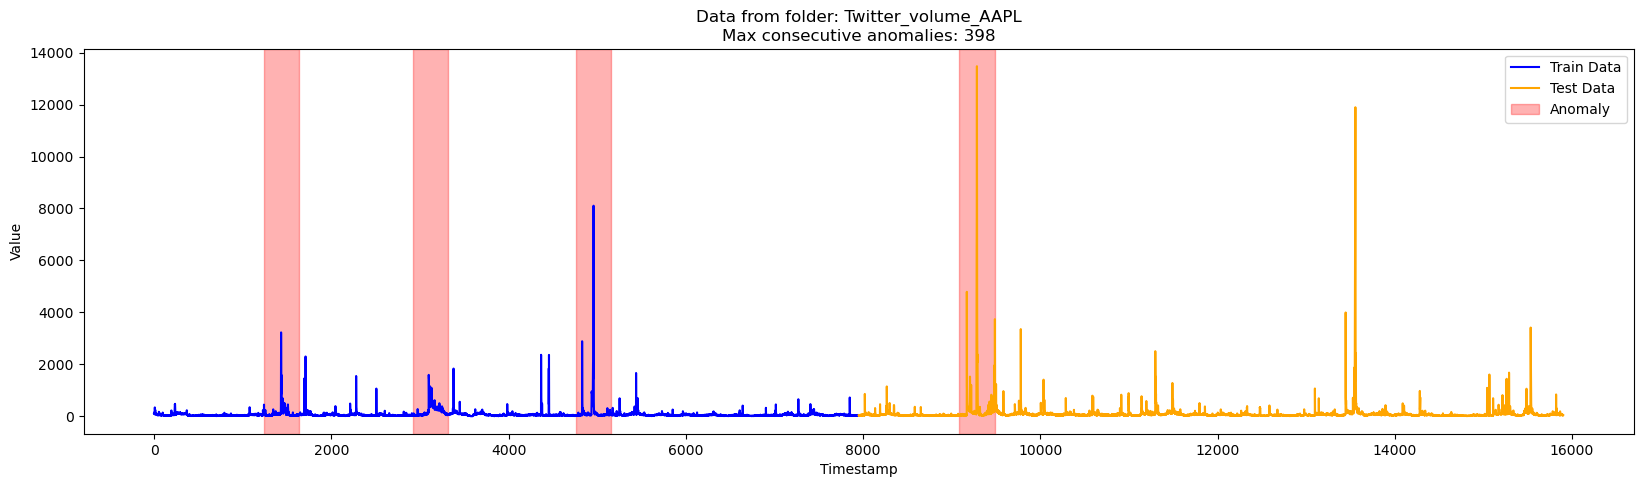

Folder: Twitter_volume_AMZN
Maximum number of consecutive anomalies: 396


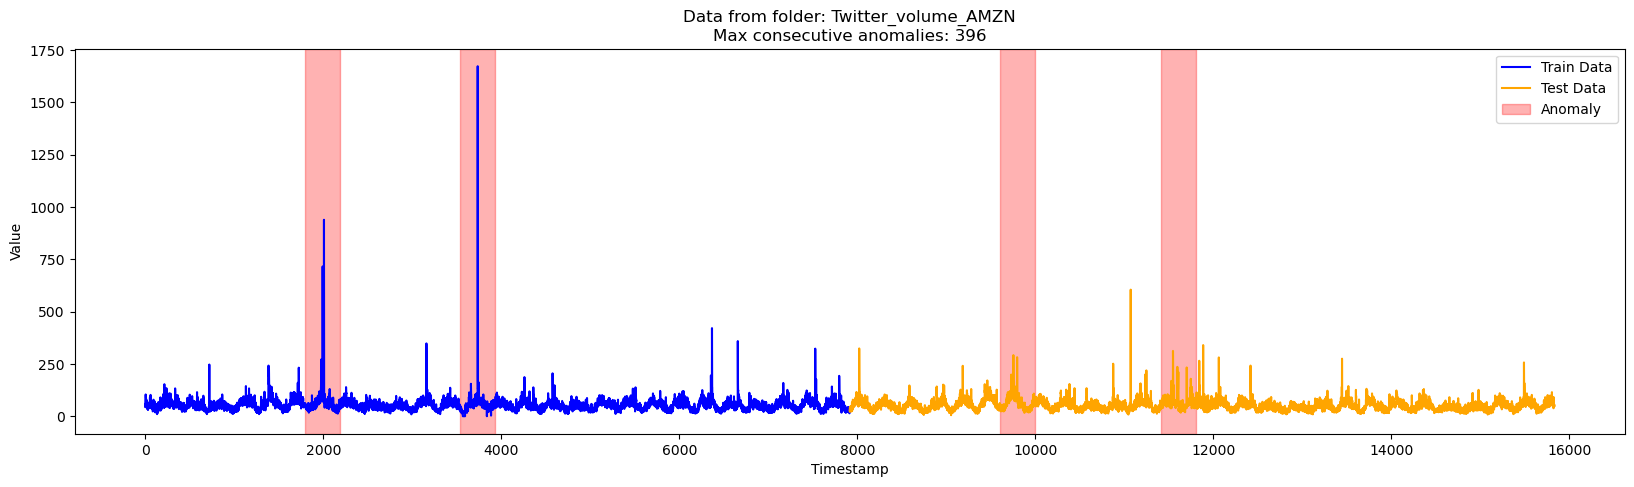

Folder: Twitter_volume_CRM
Maximum number of consecutive anomalies: 532


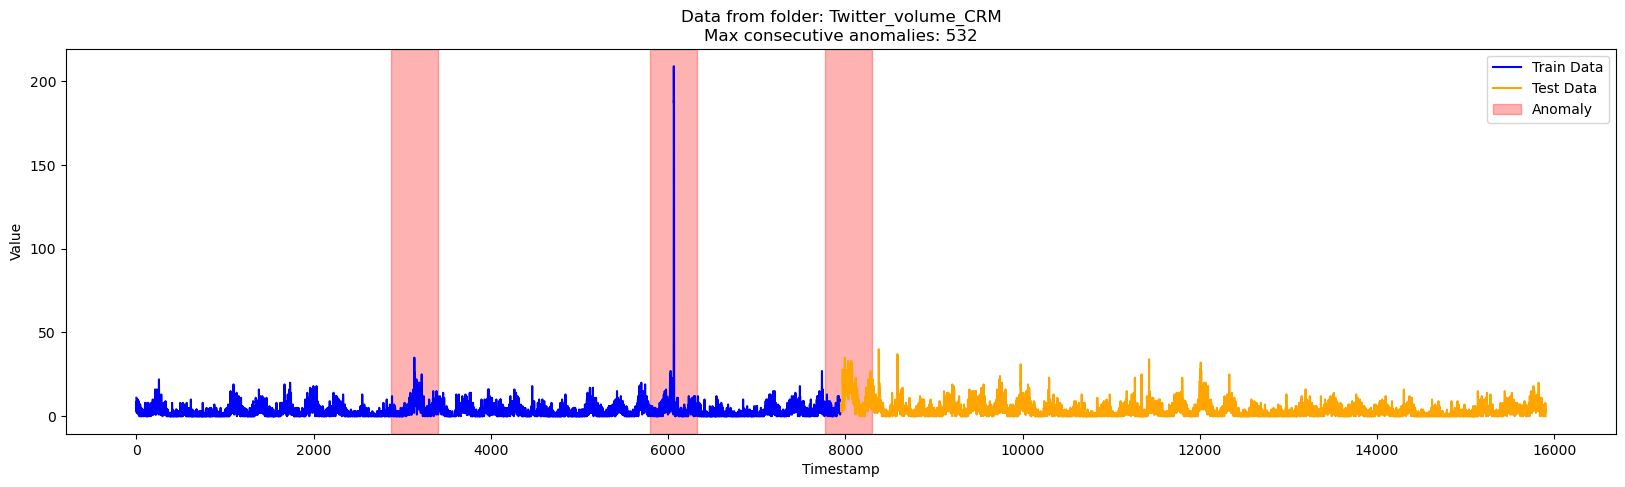

Folder: Twitter_volume_CVS
Maximum number of consecutive anomalies: 733


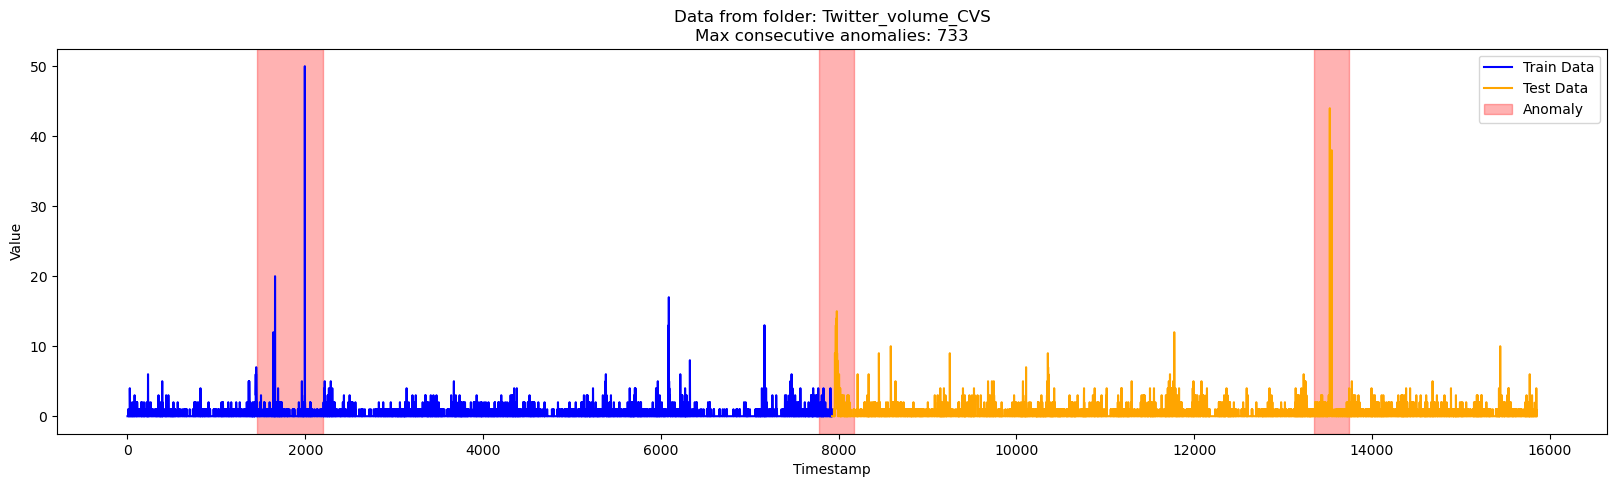

Folder: Twitter_volume_FB
Maximum number of consecutive anomalies: 792


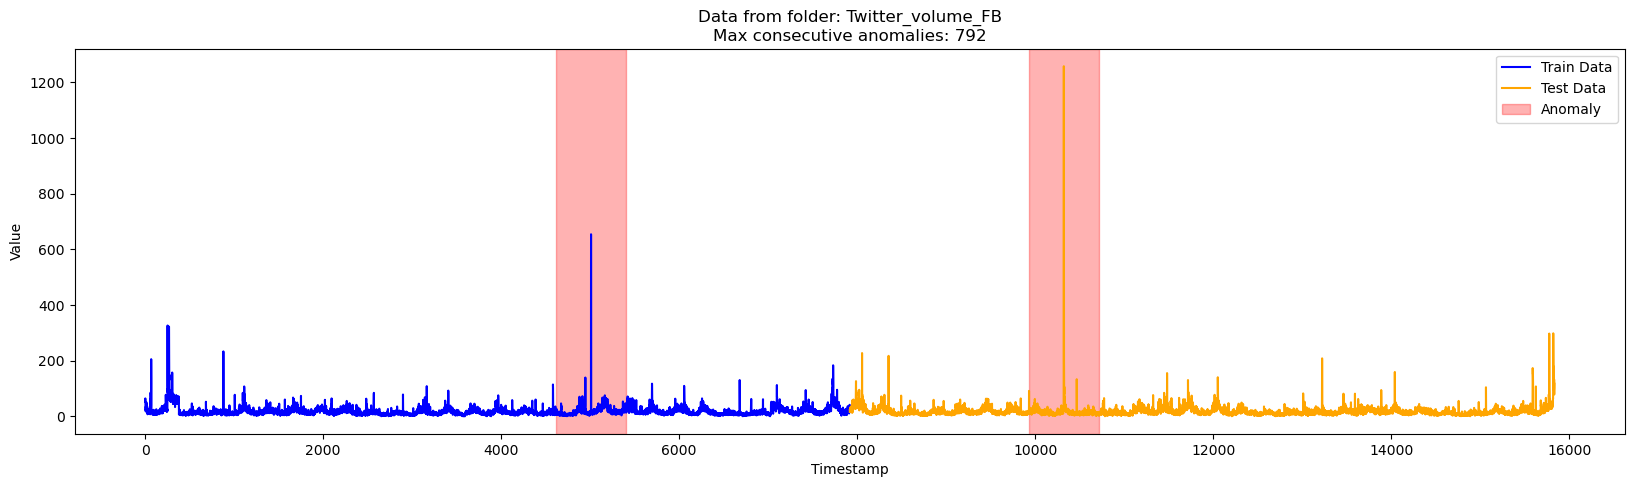

Folder: Twitter_volume_GOOG
Maximum number of consecutive anomalies: 639


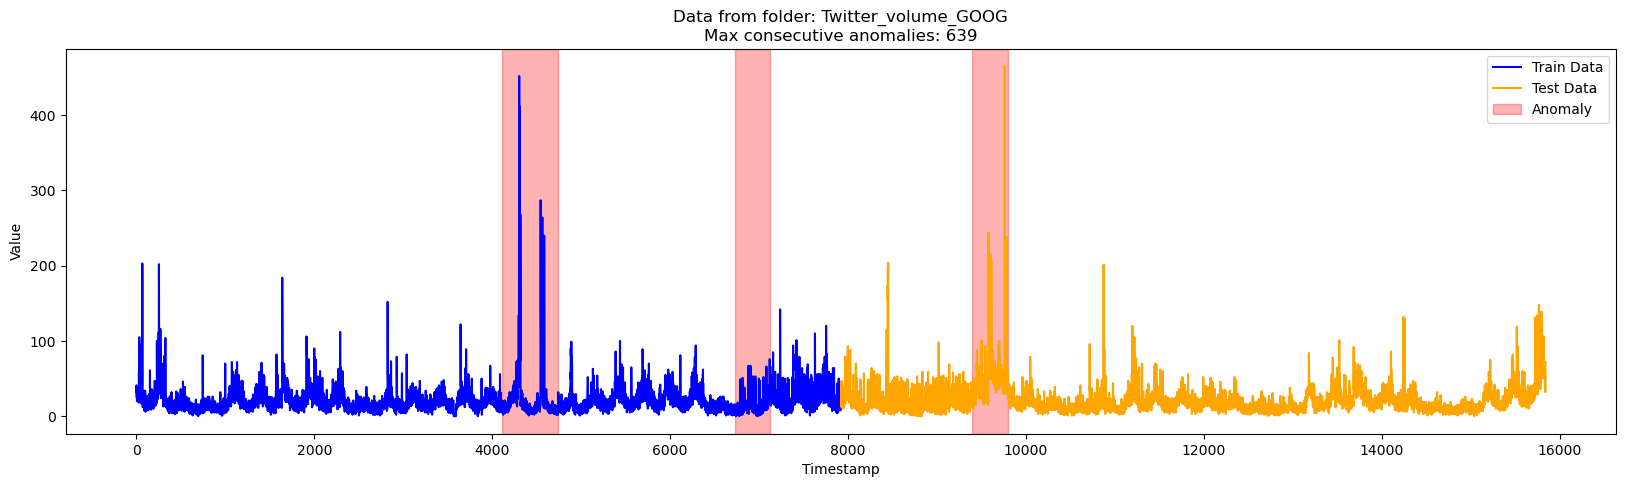

Folder: Twitter_volume_IBM
Maximum number of consecutive anomalies: 796


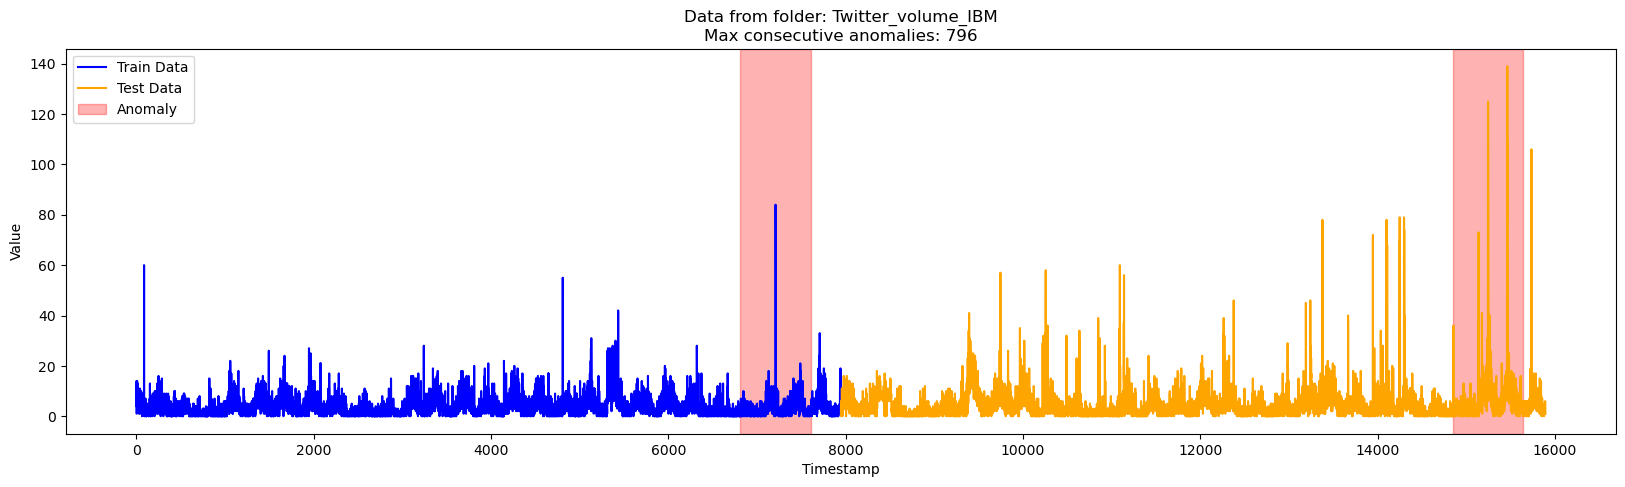

Folder: Twitter_volume_KO
Maximum number of consecutive anomalies: 530


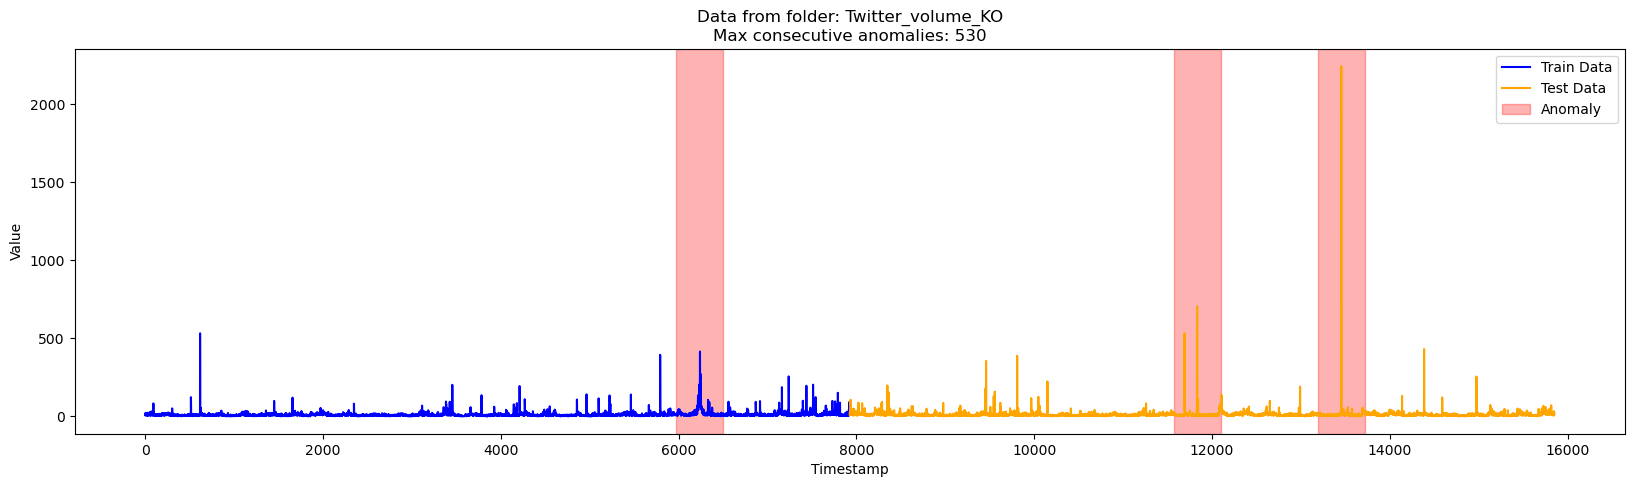

Folder: Twitter_volume_PFE
Maximum number of consecutive anomalies: 398


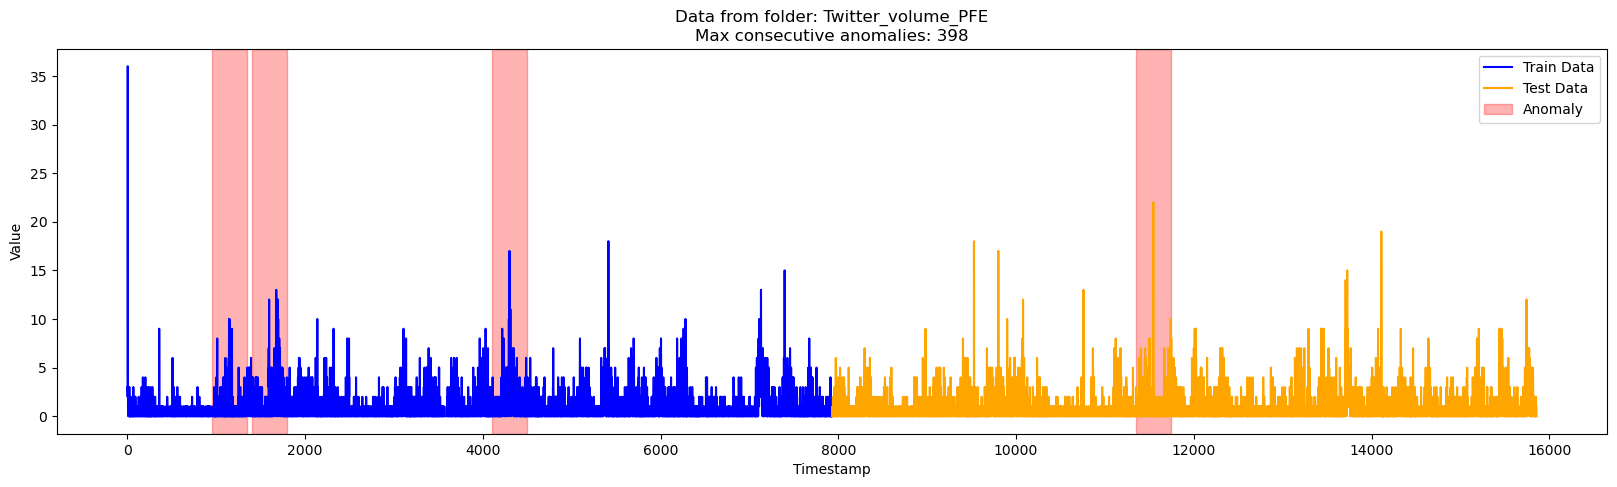

Folder: Twitter_volume_UPS
Maximum number of consecutive anomalies: 318


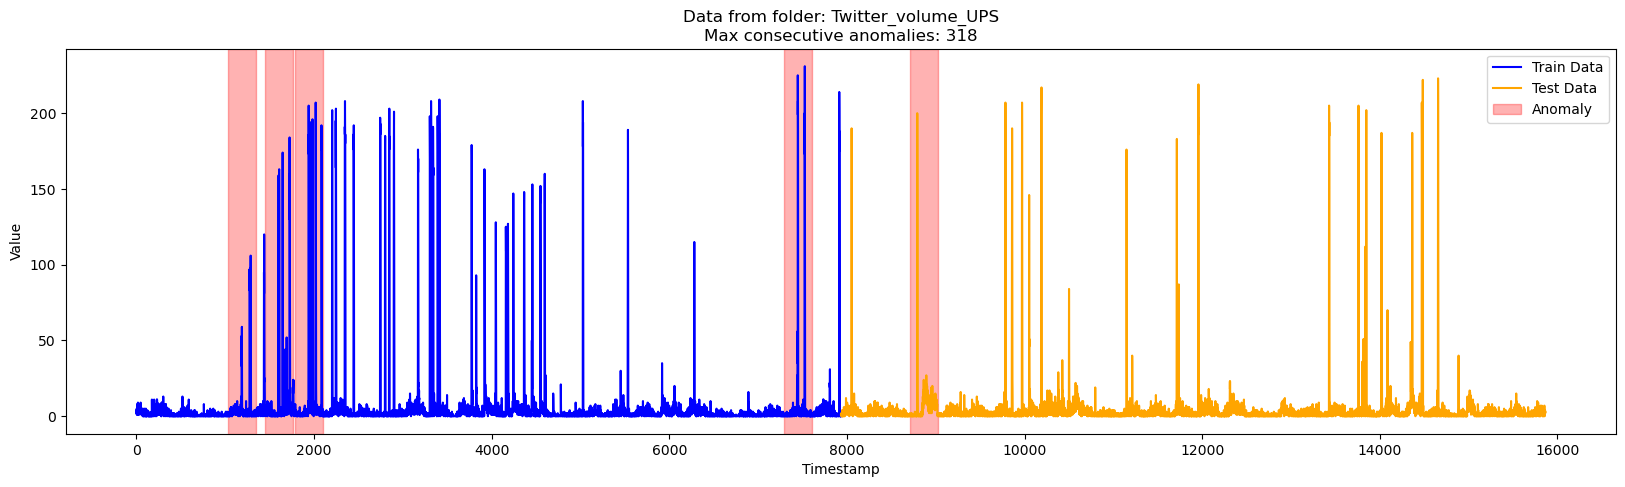

In [2]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def max_consecutive_anomalies(labels):
    max_consecutive = 0
    current_consecutive = 0
    for label in labels:
        if label:
            current_consecutive += 1
            max_consecutive = max(max_consecutive, current_consecutive)
        else:
            current_consecutive = 0
    return max_consecutive

VARDATA = 'NAB'
# Select 5 random folders
folders = os.listdir('../datasets/UTS/'+VARDATA)
#folders = random.sample(folders, 5)
#folders = ['Twitter_volume_CVS']

# Plot the train.npy and test.npy files in each selected folder
for folder in folders:
    # Load data
    train_data = np.load(f'../datasets/UTS/'+VARDATA+f'/{folder}/train.npy')
    test_data = np.load(f'../datasets/UTS/'+VARDATA+f'/{folder}/test.npy')
    train_label = np.load(f'../datasets/UTS/'+VARDATA+f'/{folder}/train_label.npy')
    test_label = np.load(f'../datasets/UTS/'+VARDATA+f'/{folder}/test_label.npy')

    # Combine train and test data
    all_data = np.concatenate((train_data, test_data))
    all_label = np.concatenate((train_label, test_label))

    # Calculate and print max consecutive anomalies
    max_anomalies = max_consecutive_anomalies(all_label)
    print(f"Folder: {folder}")
    print(f"Maximum number of consecutive anomalies: {max_anomalies}")

    # Plot the data
    plt.figure(figsize=(20, 5))
    
    # Plot train data in blue
    plt.plot(range(len(train_data)), train_data, color='blue', label='Train Data')
    
    # Plot test data in orange
    plt.plot(range(len(train_data), len(all_data)), test_data, color='orange', label='Test Data')

    all_timestamp = np.arange(all_data.shape[0])
    # Highlight anomaly regions
    anomaly_start = None
    for i, label in enumerate(all_label):
        if label and anomaly_start is None:
            anomaly_start = all_timestamp[i]
        elif not label and anomaly_start is not None:
            plt.axvspan(anomaly_start, all_timestamp[i-1], color='red', alpha=0.3)
            anomaly_start = None

    # If there's an open anomaly region at the end
    if anomaly_start is not None:
        plt.axvspan(anomaly_start, all_timestamp[-1], color='red', alpha=0.3)

    plt.title(f"Data from folder: {folder}\nMax consecutive anomalies: {max_anomalies}")
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    
    # Create a custom legend
    legend_elements = [
        plt.Line2D([0], [0], color='blue', label='Train Data'),
        plt.Line2D([0], [0], color='orange', label='Test Data'),
        Patch(facecolor='red', edgecolor='red', alpha=0.3, label='Anomaly')
    ]
    plt.legend(handles=legend_elements)
    
    plt.show()